In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import integrate
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# Generate reference solution

In [2]:
import import_ipynb
from Classes_Beam import Beam, Prob_Solv_modes, In_Cond

importing Jupyter notebook from Classes_Beam.ipynb


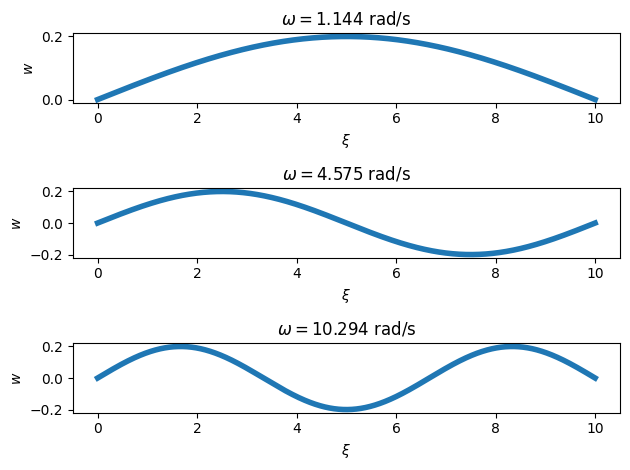

In [3]:
my_beam = Beam(10, 68e9, 2700, 8e-3, 40e-3)
# Consider omega till 400 rad/s
gamma_max = 1

# Define boundary conditions for eigenmodes
prob = Prob_Solv_modes(my_beam)
prob.pass_g_max(gamma_max)
eig_gam = prob.find_eig()

my_beam.gamma = np.array(eig_gam)
my_beam.update_freq()

# Just one parameter independent for gamma (order of the system reduced)
F = prob.find_all_F(my_beam)
prob.update_gamma(my_beam)
phi = prob.return_modemat(F)
my_beam.update_phi(phi)
my_beam.plot_modes()

In [4]:
my_In_Cond = In_Cond(my_beam)

w_0 = my_beam.phi[:,0]
w_dot_0 = np.zeros(len(w_0))

my_In_Cond.pass_init_cond(w_0, w_dot_0)
A, B = my_In_Cond.compute_coeff()

t = np.linspace(0, 10, 70)
my_beam.calculate_solution(A, B, t)

## Solve problem

~~$A_2$ should be zero for the orthogonality of eigenmodes~~  
Problem **solved**: formula for integration wasn't correct


### Define initial conditions

$w_0=\phi_1(\xi)$  
$\dot{w_0}=0$

maybe put in evidence time period $T=\frac{2\pi}{\omega}$

At this point, would make sense to apply the modal approach